In [1]:
%matplotlib inline

import collections
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

def show_image(img):
    plt.figure(figsize=(8, 8))
    if not isinstance(img[0][0], collections.Iterable):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

In [2]:
# You can reload data here
olivetti = sklearn.datasets.fetch_olivetti_faces()
iris = sklearn.datasets.load_iris()
boston = sklearn.datasets.load_boston()
digits = sklearn.datasets.load_digits()
locals().update(np.load('data/toy_data.npz'))
starry_bw_lst = list(map(list, starry_bw))

### Array shape manipulation

* `np.reshape`, `np.ndarray.flatten`
* `np.newaxis`
* `np.transpose`

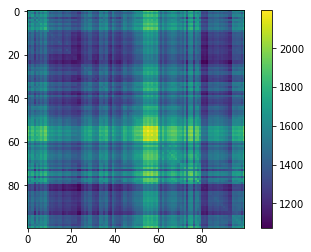

In [24]:
xs = olivetti.images[:100]
xs = xs.reshape(100, 64*64)
plt.imshow(xs @ xs.T)
plt.colorbar()

In [36]:
starry_night.shape

(633, 799, 3)

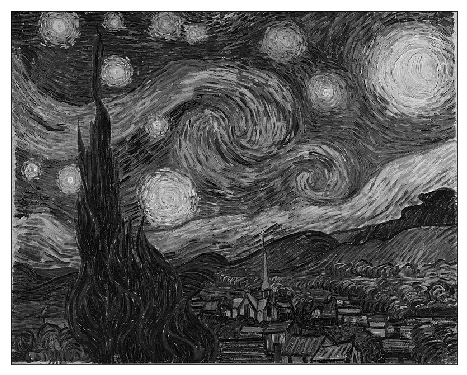

In [38]:
show_image(starry_night.transpose(2, 0, 1)[0])

**Excercise:** Form the 2-D array (without typing it in explicitly)
```python
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```

In [43]:
np.arange(1, 16).reshape(3, 5).T

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

**Excercise:** Transform olivetti data set to a set of half faces

In [60]:
m = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

In [64]:
m.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [66]:
m.transpose(1, 0)

array([[1, 3, 5],
       [2, 4, 6]])

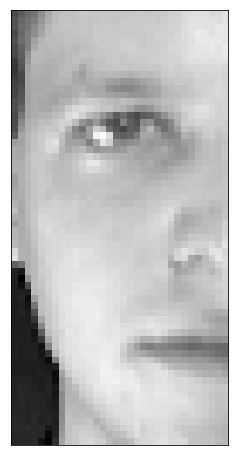

In [67]:
show_image(
    olivetti.images\
        .reshape(400, 64, 2, 32)\
        .transpose(0, 2, 1, 3)\
        .reshape(800, 64, 32)[0]
)

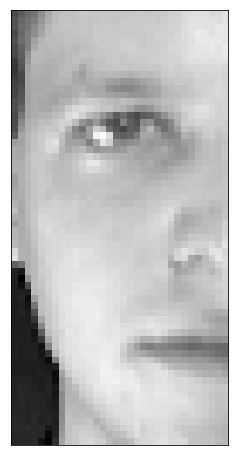

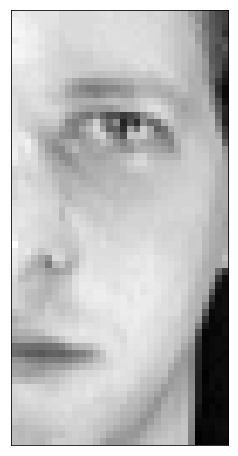

In [40]:
show_image(olivetti.images[0, :, :32]) # element 0
show_image(olivetti.images[0, :, 32:]) # element 1
# ... (shape=(800, 64, 32))

### Broadcasting

> When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when  
> * they are equal, or  
> * one of them is 1  

[More info](https://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)

In [83]:
a = np.array([1, 2, 3])

In [84]:
b = np.array([10])

In [85]:
a.shape

(3,)

In [86]:
b.shape

(1,)

In [87]:
a + b

array([11, 12, 13])

In [82]:
olivetti.images - olivetti.images.mean(axis=0)

array([[[-0.09021699, -0.06646687, -0.05892554, ..., -0.04178724,
         -0.04796463, -0.03973147],
        [-0.06338856, -0.04019657, -0.04936978, ..., -0.04878098,
         -0.04523766, -0.03546485],
        [-0.06976238, -0.03759289, -0.04479337, ..., -0.04818171,
         -0.05058855, -0.05429742],
        ...,
        [-0.12650844, -0.14750019, -0.13241754, ..., -0.15982455,
         -0.14591947, -0.12916331],
        [-0.15146694, -0.15204553, -0.15314044, ..., -0.16605364,
         -0.15049602, -0.14380169],
        [-0.15798563, -0.16017535, -0.16858456, ..., -0.1685228 ,
         -0.15248989, -0.15342984]],

       [[ 0.05441111,  0.03683892,  0.0361158 , ..., -0.22360542,
         -0.19259273, -0.15956618],
        [ 0.03991723,  0.03831583,  0.03327486, ..., -0.20580578,
         -0.17333685, -0.13877065],
        [ 0.08313018,  0.06158066,  0.03785127, ..., -0.22586766,
         -0.18281996, -0.14520651],
        ...,
        [ 0.43134278,  0.42687997,  0.4378304 , ..., -

**Excercise:** Divide each column of the array:

```python
>>> import numpy as np
a = np.arange(25).reshape(5, 5)
```

elementwise with the array ```b = np.array([1., 5, 10, 15, 20])```. (Hint: np.newaxis).

In [96]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [95]:
b = np.array([1, 5, 10, 15, 20])
b

array([ 1,  5, 10, 15, 20])

In [97]:
a.T / b

array([[0.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.2       , 1.1       , 1.06666667, 1.05      ],
       [2.        , 1.4       , 1.2       , 1.13333333, 1.1       ],
       [3.        , 1.6       , 1.3       , 1.2       , 1.15      ],
       [4.        , 1.8       , 1.4       , 1.26666667, 1.2       ]])

In [98]:
a / b[:, np.newaxis]

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.2       , 1.4       , 1.6       , 1.8       ],
       [1.        , 1.1       , 1.2       , 1.3       , 1.4       ],
       [1.        , 1.06666667, 1.13333333, 1.2       , 1.26666667],
       [1.        , 1.05      , 1.1       , 1.15      , 1.2       ]])

In [100]:
a / b # Wrong

array([[ 0.        ,  0.2       ,  0.2       ,  0.2       ,  0.2       ],
       [ 5.        ,  1.2       ,  0.7       ,  0.53333333,  0.45      ],
       [10.        ,  2.2       ,  1.2       ,  0.86666667,  0.7       ],
       [15.        ,  3.2       ,  1.7       ,  1.2       ,  0.95      ],
       [20.        ,  4.2       ,  2.2       ,  1.53333333,  1.2       ]])

**Excercise:** Normalize every image of olivetti faces dataset, show some of them after normalization

In [117]:
mean = np.mean(olivetti.images, axis=0)

In [118]:
std = np.std(olivetti.images, axis=0)

In [121]:
images = (olivetti.images - mean) / std

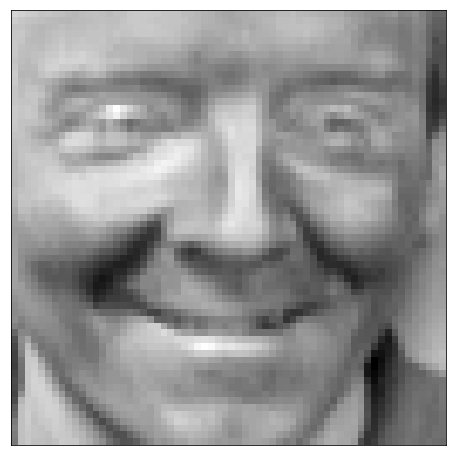

In [122]:
show_image(images[20])

**Excercise:** Make Starry Night $r$-times red than it is, then normalize the colors(at each pixel)

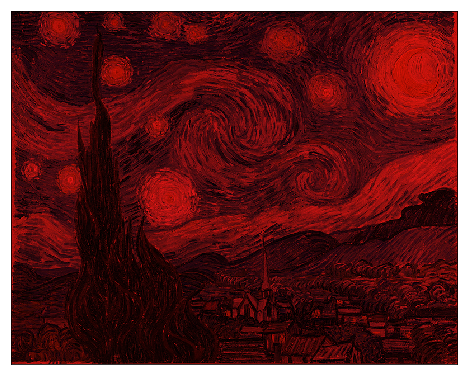

In [139]:
r = 10

img = starry_night * np.array([r, 1, 1])
img = img / img.max()
show_image(img)

**Excercise:** Write a script that computes the Mandelbrot fractal. The Mandelbrot iteration:

![](https://www.scipy-lectures.org/_images/sphx_glr_plot_mandelbrot_001.png)

```python
N_max = 50
some_threshold = 50

c = x + 1j*y

z = 0
for j in range(N_max):
    z = z**2 + c
```

Point $(x, y)$ belongs to the Mandelbrot set if $|z|$ $<$ some_threshold.

In [163]:
N = 1000

In [179]:
xs, ys = np.ogrid[-2:1:100j, -1.5:1.5:100j]

In [178]:
xs = np.linspace(-2, 1, N)[:, np.newaxis]
ys = np.linspace(-1.5, 1.5, N)

In [180]:
N_max = 20
some_threshold = 50

cs = xs + 1j*ys

zs = 0
for j in range(N_max):
    zs = zs**2 + cs

/home/ahrzb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/home/ahrzb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in square
  


/home/ahrzb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


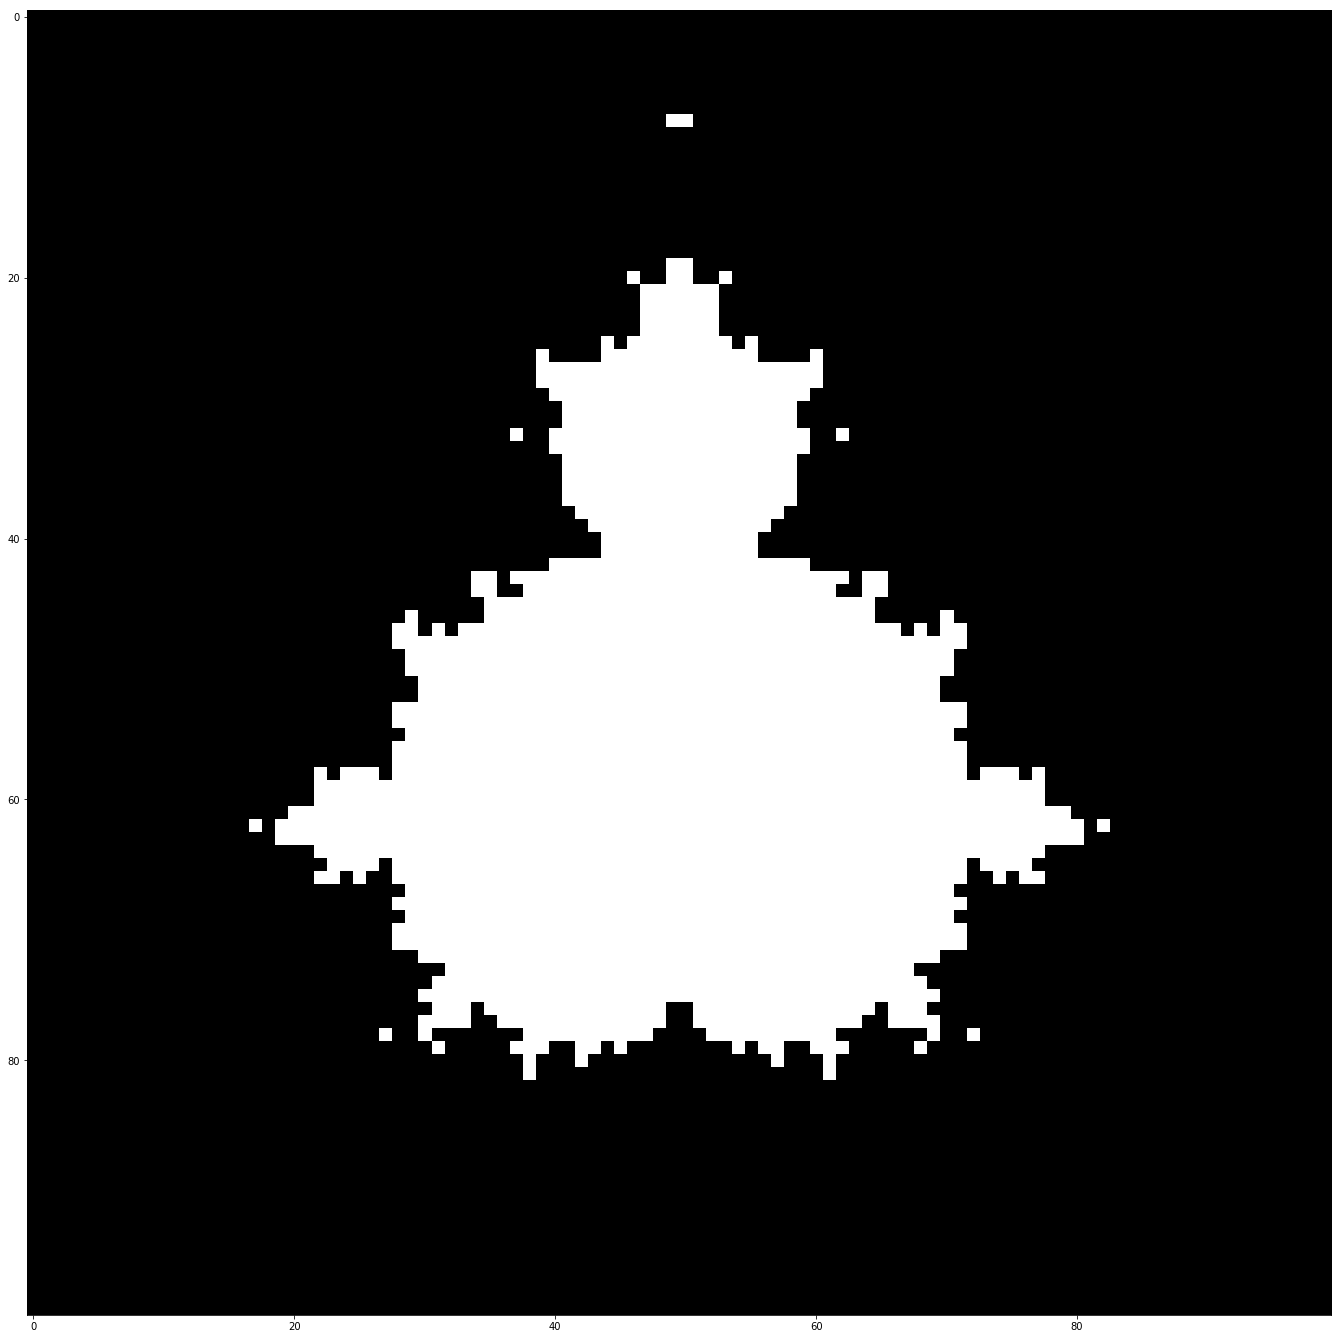

In [181]:
plt.figure(figsize=[24, 24])
plt.imshow(abs(zs) < some_threshold, cmap=plt.cm.gray)

### Sorting

* `np.sort`, `np.argsort`

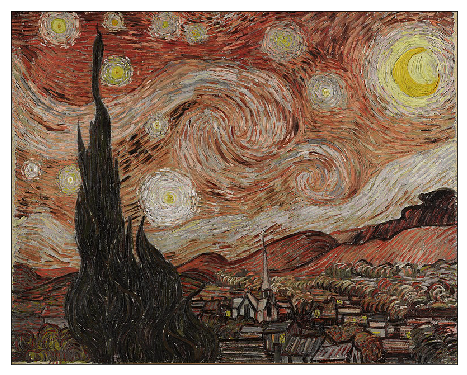

In [185]:
show_image(np.sort(starry_night, axis=-1)[:, :, ::-1])

In [192]:
iris.data[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [191]:
np.argsort(iris.data[:, 0])

array([ 13,  42,  38,   8,  41,  22,   3,   6,  47,   2,  29,  12,  45,
        24,  11,  30,  57, 106,  34,   9,  37,   1,  40,  26,  49,  35,
        43,  60,   7,  93,   4,  25,  44,  46,  98,   0,  39,  17,  23,
        21,  19,  32,  28,  27,  59,  48,  84,   5,  20,  31,  10,  16,
        36,  90,  33,  53,  81,  80,  89,  88, 121,  66,  69,  94,  64,
        79,  96,  99,  15,  55, 113,  18,  95,  67,  14,  92, 114, 142,
        82, 101, 149,  61,  70,  78,  83, 138,  85,  62, 119, 127, 134,
        71,  63,  73,  91,  68,  97, 148, 126,  72, 123, 146,  56, 133,
       100,  87, 136, 103, 132, 128, 137,  51, 115,  74, 111, 104, 116,
       147,  54, 110,  58,  75,  86, 140, 108,  77,  65, 144, 145, 124,
       143,  76, 112, 139, 141,  52, 120,  50, 102, 129, 125, 109, 107,
       130, 105, 122, 118, 117, 135, 131])

In [190]:
iris.data[np.argsort(iris.data[:, 0])]

array([[4.3, 3. , 1.1, 0.1],
       [4.4, 3.2, 1.3, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [4.6, 3.6, 1. , 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [4.6, 3.2, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.4, 1.9, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7],
       [4.9, 3.1, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 3.6, 1.4, 0.1],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5. , 2. , 3.5, 1. ],
       [5. , 3.4, 1.5, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.6, 1.4, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 2

**Excercise:** Print 10 highest tax values in boston houses dataset

In [208]:
np.sort(boston.data[:, 9])[-10:]

array([666., 666., 666., 666., 666., 711., 711., 711., 711., 711.])

**Excercise:** Sort boston houses dataset based on crime rate

In [210]:
boston.data[np.argsort(boston.data[:, 0])]

array([[6.32000e-03, 1.80000e+01, 2.31000e+00, ..., 1.53000e+01,
        3.96900e+02, 4.98000e+00],
       [9.06000e-03, 9.00000e+01, 2.97000e+00, ..., 1.53000e+01,
        3.94720e+02, 7.85000e+00],
       [1.09600e-02, 5.50000e+01, 2.25000e+00, ..., 1.53000e+01,
        3.94720e+02, 8.23000e+00],
       ...,
       [6.79208e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.84970e+02, 2.29800e+01],
       [7.35341e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.64500e+01, 2.06200e+01],
       [8.89762e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.72100e+01]])

**Excercise:** Compute top-3 accuracy of the following classifier on test set

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(digits.data, digits.target, test_size=1700)

clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
clf.fit(train_x, train_y)

predictions = clf.predict_proba(test_x)

In [215]:
np.mean(predictions.argmax(-1) == test_y)

0.8776470588235294

In [ ]:
np.mean(((-predictions).argsort(axis=-1)[:, :3] == test_y[:, np.newaxis]).any(axis=-1))